In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
d_ETH=pd.read_csv("C:/Users/Jihed/Downloads/eth_acp.csv")
d_LTC=pd.read_csv("C:/Users/Jihed/Downloads/ltc_acp.csv")

In [3]:
d_ETH['Close']=d_ETH[['Close']].shift(-1)
d_ETH=d_ETH.drop(['Date'],1)
d_ETH=d_ETH.dropna()

d_LTC['Close']=d_LTC[['Close']].shift(-1)
d_LTC=d_LTC.drop(['Date'],1)
d_LTC=d_LTC.dropna()

C:\Users\Jihed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Users\Jihed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [4]:
# For ETH
Y=np.array(d_ETH.Close)
X=d_ETH.drop(['Close'],1)

X_train=X.iloc[:-252,:]
Y_train=Y[:-252]

X_test=X.iloc[-252:,:]
Y_test=Y[-252:]

# For LTC 
Y1=np.array(d_LTC.Close)
X1=d_LTC.drop(['Close'],1)

X_train1=X1.iloc[:-252,:]
Y_train1=Y1[:-252]

X_test1=X1.iloc[-252:,:]
Y_test1=Y1[-252:]

C:\Users\Jihed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jihed\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [5]:
def RMSE(L,L1):
    LL=[]
    for i in range(len(L)):
        a=L[i]-L1[i]
        LL.append(a**2)
    b=(sum(LL)/len(L))**0.5
    return b

def MSE(L,L1):
    LL=[]
    for i in range(len(L)):
        a=L[i]-L1[i]
        LL.append(a**2)
    b=(sum(LL)/len(L))
    return b

In [6]:
def hit_ratio(L,L1):
    LL=[]
    for i in range(len(L)-1):
        if (L[i+1]-L[i])/(L1[i+1]-L1[i])>0:
            a=1
        else:
            a=0
        LL.append(a)
    return round(np.mean(LL)*100,2)

In [7]:
def inv_transf(L,a,b):
    L1=[]
    for i in range(len(L)):
        L1.append(L[i]*(a-b)+b)
    return L1

In [8]:
prediction_day_array_ETH_list = Y_test.tolist()
prediction_day_array_ETH_list_Inver = inv_transf(prediction_day_array_ETH_list,4812.087402,84.308296)

prediction_day_array_LTC_list = Y_test1.tolist()
prediction_day_array_LTC_list_Inver = inv_transf(prediction_day_array_LTC_list,386.450775,1.157010)


# SVM 

In [9]:
from sklearn.svm import SVR

In [10]:
svr_rbf1=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf2=SVR(kernel='rbf',C=1e3,gamma=0.00001)

In [11]:
svr_rbf1.fit(X_train,Y_train)
svr_rbf2.fit(X_train1,Y_train1)

SVR(C=1000.0, gamma=1e-05)

In [12]:
svm_pred_EHT=svr_rbf1.predict(X_test)
svm_pred_LTC=svr_rbf2.predict(X_test1)

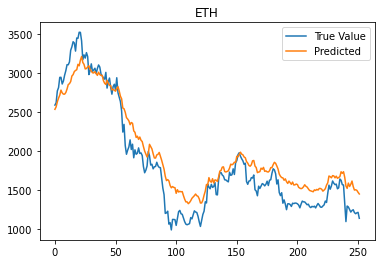

In [13]:
plt.plot(inv_transf(Y_test,4812.087402,84.308296),label='True Value')
plt.plot(inv_transf(svm_pred_EHT,4812.087402,84.308296),label='Predicted')
plt.title("ETH")
plt.legend()
plt.show()

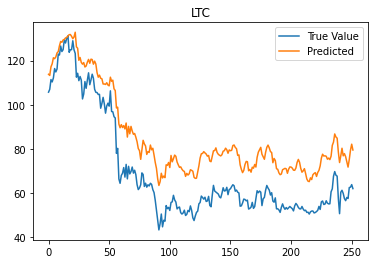

In [14]:
plt.plot(inv_transf(Y_test1,386.450775,1.157010),label='True Value')
plt.plot(inv_transf(svm_pred_LTC,386.450775,1.157010),label='Predicted')
plt.title("LTC")
plt.legend()
plt.show()

In [15]:
svm_pred_EHT_list = svm_pred_EHT.tolist()
svm_pred_LTC_list = svm_pred_EHT.tolist()

svm_pred_EHT_list = inv_transf(svm_pred_EHT_list,4812.087402,84.308296)
svm_pred_LTC_list = inv_transf(svm_pred_LTC_list,386.450775,1.157010)

In [16]:
RMSE_EHT=RMSE(svm_pred_EHT_list,prediction_day_array_ETH_list_Inver)
MSE_EHT=MSE(svm_pred_EHT_list,prediction_day_array_ETH_list_Inver)
Hit_Ratio_ETH=hit_ratio(svm_pred_EHT_list,prediction_day_array_ETH_list_Inver)

print('RMSE (ETH)',RMSE_EHT)
print('MSE (ETH)',MSE_EHT)
print('Hit Ratio en % de (ETH) est ',Hit_Ratio_ETH,'%')

RMSE (ETH) 227.10750533630667
MSE (ETH) 51577.81898008057
Hit Ratio en % de (ETH) est  60.56 %


In [17]:
RMSE_LTC=RMSE(svm_pred_LTC_list,prediction_day_array_LTC_list_Inver)
MSE_LTC=MSE(svm_pred_LTC_list,prediction_day_array_LTC_list_Inver)
Hit_Ratio_LTC=hit_ratio(svm_pred_LTC_list,prediction_day_array_LTC_list_Inver)

print('RMSE (LTC)',RMSE_LTC)
print('MSE (LTC)',MSE_LTC)
print('Hit Ratio en % de (LTC) est ',Hit_Ratio_LTC,'%')

RMSE (LTC) 89.26315174222573
MSE (LTC) 7967.910258955616
Hit Ratio en % de (LTC) est  59.76 %


# RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
RFR1=RandomForestRegressor()
RFR2=RandomForestRegressor()

In [20]:
RFR1.fit(X_train,Y_train)
RFR2.fit(X_train1,Y_train1)

RandomForestRegressor()

In [21]:
RFR_pred_EHT=RFR1.predict(X_test)
RFR_pred_LTC=RFR2.predict(X_test1)

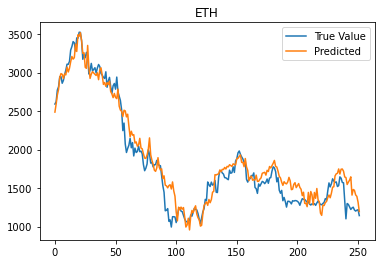

In [22]:
plt.plot(inv_transf(Y_test,4812.087402,84.308296),label='True Value')
plt.plot(inv_transf(RFR_pred_EHT,4812.087402,84.308296),label='Predicted')
plt.title("ETH")
plt.legend()
plt.show()

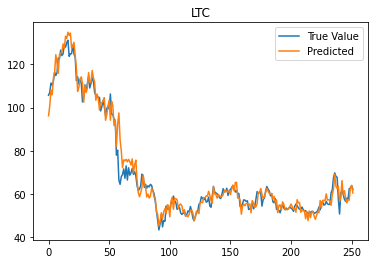

In [23]:
plt.plot(inv_transf(Y_test1,386.450775,1.157010),label='True Value')
plt.plot(inv_transf(RFR_pred_LTC,386.450775,1.157010),label='Predicted')
plt.title("LTC")
plt.legend()
plt.show()

In [24]:
RFR_pred_EHT_list = RFR_pred_EHT.tolist()
RFR_pred_LTC_list = RFR_pred_LTC.tolist()

RFR_pred_EHT_list = inv_transf(RFR_pred_EHT_list,4812.087402,84.308296)
RFR_pred_LTC_list = inv_transf(RFR_pred_LTC_list,386.450775,1.157010)

In [25]:
RFR_RMSE_EHT=RMSE(RFR_pred_EHT_list,prediction_day_array_ETH_list_Inver)
RFR_MSE_EHT=MSE(RFR_pred_EHT_list,prediction_day_array_ETH_list_Inver)
Hit_Ratio_LTC11=hit_ratio(RFR_pred_EHT_list,prediction_day_array_ETH_list_Inver)

print('RMSE (ETH)',RFR_RMSE_EHT)
print('MSE (ETH)',RFR_MSE_EHT)
print('Hit Ratio en % de (ETH) est ',Hit_Ratio_LTC11,'%')

RMSE (ETH) 160.06719593274957
MSE (ETH) 25621.507213773242
Hit Ratio en % de (ETH) est  58.96 %


In [26]:
RFR_RMSE_LTC=RMSE(RFR_pred_LTC_list,prediction_day_array_LTC_list_Inver)
RFR_MSE_LTC=MSE(RFR_pred_LTC_list,prediction_day_array_LTC_list_Inver)
Hit_Ratio_LTC1=hit_ratio(RFR_pred_LTC_list,prediction_day_array_LTC_list_Inver)

print('RMSE (LTC)',RFR_RMSE_LTC)
print('MSE (LTC)',RFR_MSE_LTC)
print('Hit Ratio en % de (LTC) est ',Hit_Ratio_LTC1,'%')

RMSE (LTC) 4.172865435555802
MSE (LTC) 17.412805943256313
Hit Ratio en % de (LTC) est  61.35 %


# MLPRegressor

In [27]:
from sklearn.neural_network import MLPRegressor

In [28]:
mlp1=MLPRegressor()
mlp2=MLPRegressor()

In [29]:
mlp1.fit(X_train,Y_train)
mlp2.fit(X_train1,Y_train1)

MLPRegressor()

In [30]:
mlp_pred_EHT=mlp1.predict(X_test)
mlp_pred_LTC=mlp2.predict(X_test1)

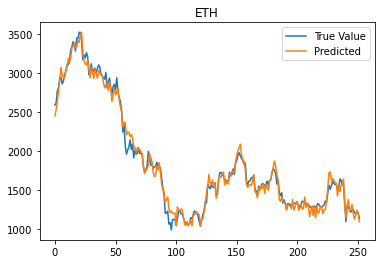

In [31]:
plt.plot(inv_transf(Y_test,4812.087402,84.308296),label='True Value')
plt.plot(inv_transf(mlp_pred_EHT,4812.087402,84.308296),label='Predicted')
plt.title("ETH")
plt.legend()
plt.show()

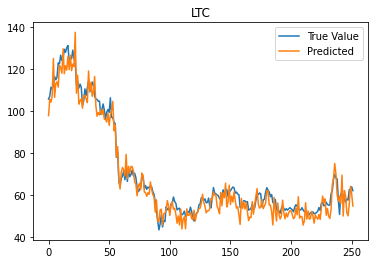

In [32]:
plt.plot(inv_transf(Y_test1,386.450775,1.157010),label='True Value')
plt.plot(inv_transf(mlp_pred_LTC,386.450775,1.157010),label='Predicted')
plt.title("LTC")
plt.legend()
plt.show()

In [33]:
mlp_pred_EHT_list = mlp_pred_EHT.tolist()
mlp_pred_LTC_list = mlp_pred_LTC.tolist()

mlp_pred_EHT_list = inv_transf(mlp_pred_EHT_list,4812.087402,84.308296)
mlp_pred_LTC_list = inv_transf(mlp_pred_LTC_list,386.450775,1.157010)

In [34]:
mlp_RMSE_EHT=RMSE(mlp_pred_EHT_list,prediction_day_array_ETH_list_Inver)
mlp_MSE_EHT=MSE(mlp_pred_EHT_list,prediction_day_array_ETH_list_Inver)
Hit_Ratio_LTC22=hit_ratio(mlp_pred_EHT_list,prediction_day_array_ETH_list_Inver)

print('RMSE (ETH)',mlp_RMSE_EHT)
print('MSE (ETH)',mlp_MSE_EHT)
print('Hit Ratio en % de (ETH) est ',Hit_Ratio_LTC22,'%')

RMSE (ETH) 79.91290728785111
MSE (ETH) 6386.072751196688
Hit Ratio en % de (ETH) est  62.95 %


In [35]:
mlp_RMSE_LTC=RMSE(mlp_pred_LTC_list,prediction_day_array_LTC_list_Inver)
mlp_MSE_LTC=MSE(mlp_pred_LTC_list,prediction_day_array_LTC_list_Inver)
Hit_Ratio_LTC2=hit_ratio(mlp_pred_LTC_list,prediction_day_array_LTC_list_Inver)

print('RMSE (LTC)',mlp_RMSE_LTC)
print('MSE (LTC)',mlp_MSE_LTC)
print('Hit Ratio en % de (LTC) est ',Hit_Ratio_LTC2,'%')

RMSE (LTC) 4.63354512353078
MSE (LTC) 21.469740411795872
Hit Ratio en % de (LTC) est  65.74 %
